In [1]:
import pandas as pd
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns

In [11]:
df = pd.read_csv('Sentiment.csv')

In [12]:
df

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [13]:
df.describe()

,id,candidate_confidence,relevant_yn_confidence,sentiment_confidence,subject_matter_confidence,retweet_count,tweet_id
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,1.387100e+04
mean,6936.000000,0.855689,0.927304,0.756936,0.782801,45.803331,6.296058e+17
std,4004.357127,0.241388,0.141696,0.217682,0.258215,153.981724,9.611863e+13
min,1.000000,0.222200,0.333300,0.186000,0.222200,0.000000,6.294531e+17
25%,3468.500000,0.674200,1.000000,0.651700,0.641300,0.000000,6.294861e+17
50%,6936.000000,1.000000,1.000000,0.681300,1.000000,2.000000,6.296726e+17
75%,10403.500000,1.000000,1.000000,1.000000,1.000000,44.000000,6.296882e+17
max,13871.000000,1.000000,1.000000,1.000000,1.000000,4965.000000,6.297017e+17


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [15]:
df = df[['text','sentiment']]

In [16]:
df = df[df.sentiment != "Neutral"]

In [17]:
df.reset_index(inplace=True,drop=True)
df

,text,sentiment
0,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
1,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
2,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
3,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
4,RT @warriorwoman91: I liked her and was happy ...,Negative
...,...,...
10724,RT @cappy_yarbrough: Love to see men who will ...,Negative
10725,RT @georgehenryw: Who thought Huckabee exceede...,Positive
10726,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
10727,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


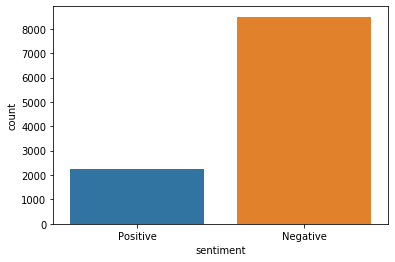

In [18]:
sns.countplot(x="sentiment",data=df)

In [32]:
import re 
from nltk.corpus import stopwords
import preprocessor as p

In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
lemmatizer = WordNetLemmatizer()
len(df)

10729

In [33]:
corpus = []
for i in range(0,len(df)):
    review = p.clean(df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])
y

array([1, 1, 1, ..., 1, 0, 1])

In [61]:
vocab_size = 2000

In [62]:
onehot_repr = [one_hot(words,vocab_size) for words in corpus]

In [63]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  638 1001   28]
 [   0    0    0 ...  969   57  566]
 [   0    0    0 ... 1239 1386 1675]
 ...
 [   0    0    0 ... 1616  200 1646]
 [   0    0    0 ...   80 1517 1966]
 [   0    0    0 ... 1675  305  820]]


In [64]:
embedding_vector_features = 400
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 400)           800000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,000,501
Trainable params: 1,000,501
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)
y_final

array([1, 1, 1, ..., 1, 0, 1])

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size = 0.2,random_state=42)

In [68]:
model.fit(X_train,y_train,epochs=10,batch_size=64,verbose = 1)

Train on 8583 samples
Epoch 1/10
8583/8583 [==============================] - 6s 669us/sample - loss: 0.0587 - accuracy: 0.9738
Epoch 2/10
8583/8583 [==============================] - 6s 667us/sample - loss: 0.0572 - accuracy: 0.9724
Epoch 3/10
8583/8583 [==============================] - 7s 862us/sample - loss: 0.0559 - accuracy: 0.9737
Epoch 4/10
8583/8583 [==============================] - 7s 853us/sample - loss: 0.0555 - accuracy: 0.9737
Epoch 5/10
8583/8583 [==============================] - 8s 884us/sample - loss: 0.0552 - accuracy: 0.9746
Epoch 6/10
8583/8583 [==============================] - 7s 804us/sample - loss: 0.0549 - accuracy: 0.9738
Epoch 7/10
8583/8583 [==============================] - 7s 832us/sample - loss: 0.0548 - accuracy: 0.9734
Epoch 8/10
8583/8583 [==============================] - 7s 784us/sample - loss: 0.0543 - accuracy: 0.9733
Epoch 9/10
8583/8583 [==============================] - 7s 798us/sample - loss: 0.0547 - accuracy: 0.9738
Epoch 10/10
8583/8583 [=

In [71]:
y_pred = model.predict_classes(X_test)

In [72]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [74]:
confusion_matrix(y_test,y_pred)

array([[1516,  197],
       [ 231,  202]], dtype=int64)

In [75]:
accuracy_score(y_test,y_pred)

0.8005591798695247